In [1]:
from ipywidgets import IntProgress
from IPython.display import display

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import kaggle
import os
import glob
import shutil
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


BASE_DIR = os.getcwd()

2022-10-16 14:52:45.453981: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-16 14:52:45.981317: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-16 14:52:46.882526: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/simon/anaconda3/envs/tf/lib/
2022-10-16 14:52:46.882601: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.

Num GPUs Available:  1


2022-10-16 14:52:48.496035: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-16 14:52:48.545024: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-16 14:52:48.545249: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [26]:
!kaggle  datasets download -d jessicali9530/celeba-dataset
!unzip -d dataset -u -q celeba-dataset.zip 

/bin/bash: /home/simon/anaconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
kaggle.json
/bin/bash: /home/simon/anaconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
100%|█████████████████████████████████████▉| 1.33G/1.33G [01:53<00:00, 12.9MB/s]
100%|██████████████████████████████████████| 1.33G/1.33G [01:54<00:00, 12.5MB/s]


In [84]:
#Sort images into categories
df = pd.read_csv('dataset/list_attr_celeba.csv')
df.head()
is_male_df = df["Male"]

ds_PATH = "dataset/img_align_celeba/img_align_celeba/"

for file in glob.glob(os.path.join(ds_PATH, "*.jpg")):
    file_number = file.strip(ds_PATH).strip(".jpg")
    if is_male_df[int(file_number)-1] == 1:
        shutil.copy2(file, os.path.join(BASE_DIR, "dataset/preprocessed/male", file_number+".jpg"))
    else:
        shutil.copy2(file, os.path.join(BASE_DIR, "dataset/preprocessed/female", file_number+".jpg")) 

IntProgress(value=0, max=202599)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceed

In [2]:
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
BATCH_SIZE = 128

In [3]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(BASE_DIR, "dataset/preprocessed"),
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE)
train_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 214693 files belonging to 2 classes.


2022-10-16 14:53:04.808984: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-16 14:53:04.809258: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-16 14:53:04.809386: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-16 14:53:04.809464: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
train_ds.save(os.path.join(BASE_DIR, "dataset"), compression='GZIP')

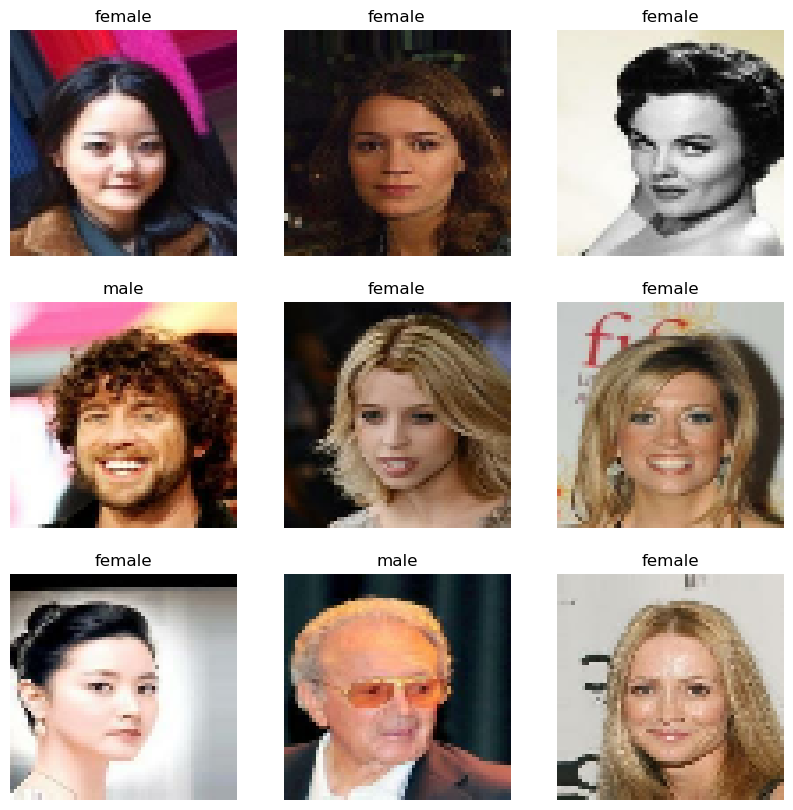

In [96]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
